In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,LSTM, Reshape, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, Dropout, Dense,LSTM

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np
import random





In [ ]:
base_dir = 'D:/Projects/Research/Train_test_val_new'

train_dir = os.path.join(base_dir, 'train')
train_dir_fire = os.path.join(train_dir, 'Fire')
train_dir_nofire = os.path.join(train_dir, 'Non-fire')

test_dir = os.path.join(base_dir, 'test')
test_dir_fire = os.path.join(test_dir, 'Fire')
test_dir_nofire = os.path.join(test_dir, 'Non-fire')

val_dir = os.path.join(base_dir, 'test')
val_dir_fire = os.path.join(val_dir, 'Fire')
val_dir_nofire = os.path.join(val_dir, 'Non-fire')

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='binary')

val_generator = test_datagen.flow_from_directory(val_dir,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 10221 images belonging to 2 classes.
Found 1280 images belonging to 2 classes.
Found 1280 images belonging to 2 classes.


In [ ]:
batch_size = 32
epochs = 20

In [ ]:
# import os
# import cv2
# import numpy as np

labels = ['Fire', 'Non-fire']
img_size = 64

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                img_arr = cv2.imread(img_path)[...,::-1]  # Convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to the preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

# Example usage:
train_data = get_data(r"D:/Projects/Research/Train_test_val_new/train/")
val_data = get_data(r"D:/Projects/Research/Train_test_val_new/val/")
test_data = get_data(r"D:/Projects/Research/Train_test_val_new/test/")

# Now, train_data, val_data, and test_data should contain the image data and corresponding labels.


'NoneType' object is not subscriptable


In [ ]:
print(train_data.shape)

(10220, 2)


In [ ]:
#val
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train_data:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val_data:
  x_val.append(feature)
  y_val.append(label)

for feature, label in test_data:
  x_test.append(feature)
  y_test.append(label)

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test=np.array(x_test)/255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)
print("x_val:",x_val.shape)
print("y_val:",y_val.shape)
print(x_train)

x_train: (10220, 64, 64, 3)
y_train: (10220,)
x_test: (1280, 64, 64, 3)
y_test: (1280,)
x_val: (1276, 64, 64, 3)
y_val: (1276,)
[[[[0.36078431 0.18039216 0.18823529]
   [0.41568627 0.18431373 0.16078431]
   [0.41568627 0.18431373 0.16078431]
   ...
   [0.4        0.17254902 0.2       ]
   [0.34509804 0.21568627 0.21176471]
   [0.27058824 0.18823529 0.22745098]]

  [[0.32156863 0.18823529 0.18823529]
   [0.35686275 0.19215686 0.16862745]
   [0.35686275 0.17647059 0.15686275]
   ...
   [0.4745098  0.19215686 0.20392157]
   [0.33333333 0.17647059 0.16862745]
   [0.30980392 0.18431373 0.2       ]]

  [[0.34901961 0.18823529 0.17254902]
   [0.36078431 0.18431373 0.15294118]
   [0.34509804 0.18431373 0.16078431]
   ...
   [0.64705882 0.20392157 0.12156863]
   [0.45882353 0.19215686 0.15686275]
   [0.4        0.2        0.20784314]]

  ...

  [[0.25882353 0.19607843 0.24705882]
   [0.26666667 0.20392157 0.25490196]
   [0.27058824 0.20784314 0.25882353]
   ...
   [0.19215686 0.16078431 0.21176

In [ ]:
x_train = np.array(x_train).reshape(10220,1,64,64, 3)

x_val = np.array(x_val).reshape(1276, 1, 64, 64, 3)

x_test = np.array(x_test).reshape(1280, 1, 64, 64, 3)

In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv2D(64,(3,3),activation='relu'),input_shape=(None,64,64,3)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
model.add(BatchNormalization())
model.add(TimeDistributed(Conv2D(32,(3,3),activation='relu')))
#model_mix_shoulder.add(TimeDistributed(Conv2D(128,(3,3),activation='relu')))
#model_mix_shoulder.add(TimeDistributed(Conv2D(56,(3,3),activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))

#model_mix_shoulder.add(TimeDistributed(Conv2D(256,(3,3),activation='relu')))
#model_mix_shoulder.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))

model.add(BatchNormalization())
model.add(TimeDistributed(Flatten()))

#RNN
model.add(LSTM(100,return_sequences=False))

model.add(Dense(1,activation='sigmoid'))
#model.add(activation('sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_5 (TimeDi  (None, None, 62, 62, 64   1792      
 stributed)                  )                                   
                                                                 
 time_distributed_6 (TimeDi  (None, None, 31, 31, 64   0         
 stributed)                  )                                   
                                                                 
 batch_normalization (Batch  (None, None, 31, 31, 64   256       
 Normalization)              )                                   
                                                                 
 time_distributed_7 (TimeDi  (None, None, 29, 29, 32   18464     
 stributed)                  )                                   
                                                                 
 time_distributed_8 (TimeDi  (None, None, 14, 14, 32  

In [ ]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.layers

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(x_train,y_train,epochs = 25,validation_data = (x_val, y_val),shuffle=True,batch_size=32, callbacks=early_stopping)

Epoch 1/25
320/320 [==============================] - 45s 130ms/step - loss: 0.3296 - accuracy: 0.8655 - val_loss: 0.4081 - val_accuracy: 0.8393
Epoch 2/25
320/320 [==============================] - 41s 127ms/step - loss: 0.2703 - accuracy: 0.8911 - val_loss: 0.2743 - val_accuracy: 0.8918
Epoch 3/25
320/320 [==============================] - 41s 127ms/step - loss: 0.2436 - accuracy: 0.9050 - val_loss: 0.2690 - val_accuracy: 0.8832
Epoch 4/25
320/320 [==============================] - 41s 127ms/step - loss: 0.2212 - accuracy: 0.9136 - val_loss: 0.3182 - val_accuracy: 0.8793
Epoch 5/25
320/320 [==============================] - 41s 127ms/step - loss: 0.1950 - accuracy: 0.9266 - val_loss: 0.2328 - val_accuracy: 0.9052
Epoch 6/25
320/320 [==============================] - 41s 127ms/step - loss: 0.1670 - accuracy: 0.9380 - val_loss: 0.2882 - val_accuracy: 0.8871
Epoch 7/25
320/320 [==============================] - 41s 127ms/step - loss: 0.1400 - accuracy: 0.9497 - val_loss: 0.2854 - val_ac

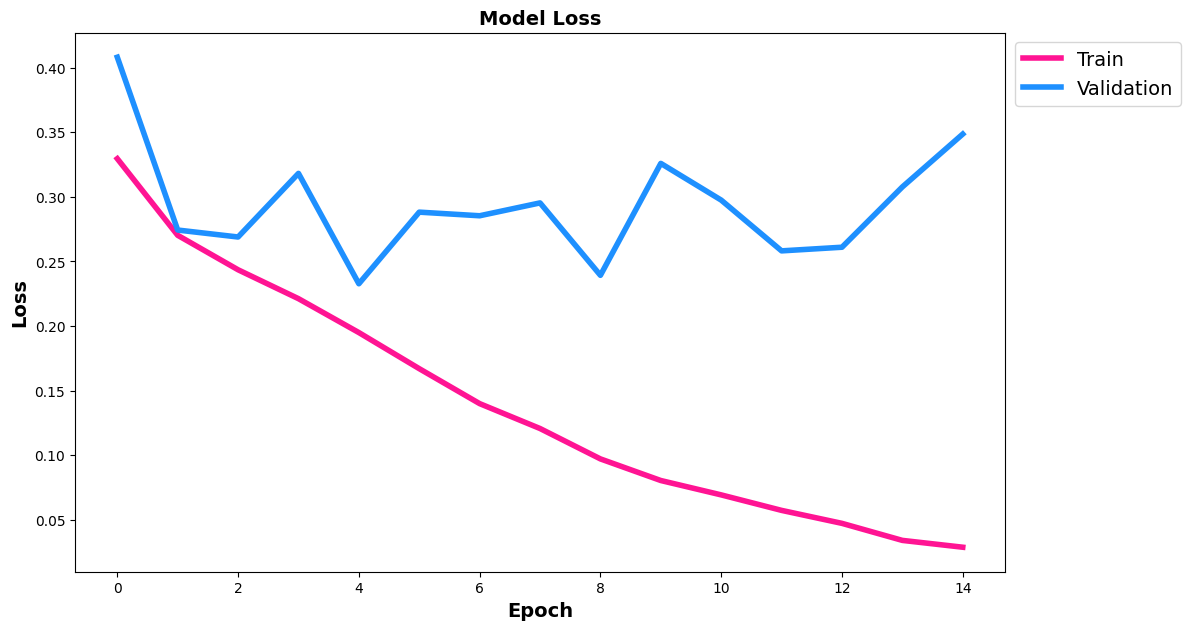

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(history.history['loss'], color='deeppink', linewidth=4)
plt.plot(history.history['val_loss'], color='dodgerblue', linewidth=4)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.ylabel('Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1), fontsize=14)
plt.show()

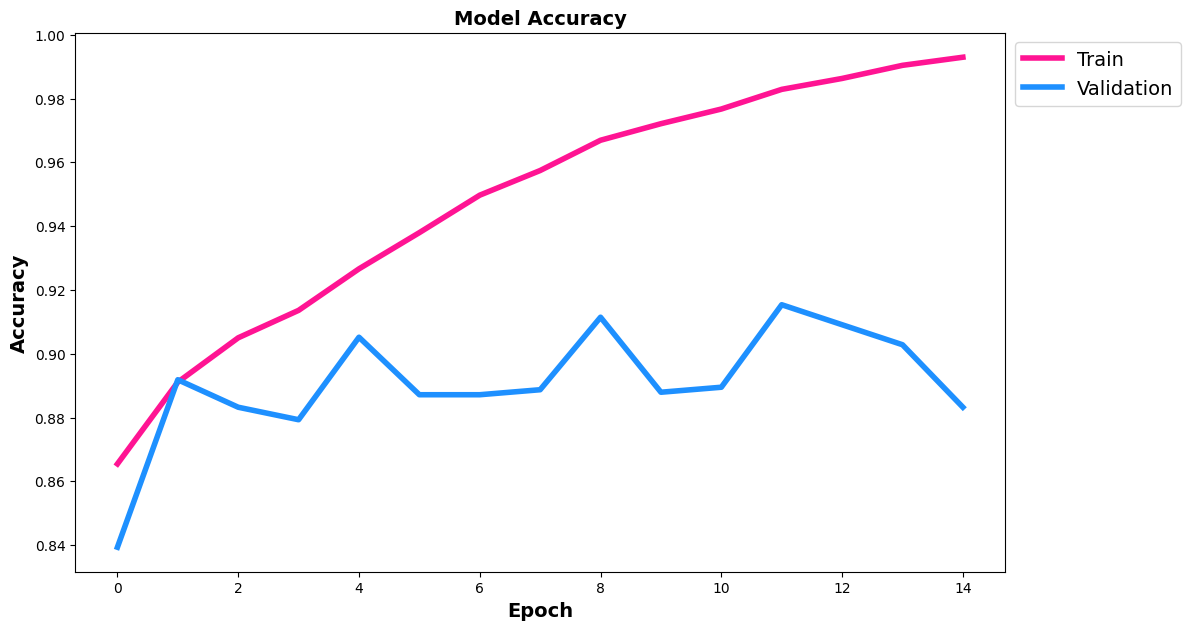

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(history.history['accuracy'], color='deeppink', linewidth=4)
plt.plot(history.history['val_accuracy'], color='dodgerblue', linewidth=4)
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1), fontsize=14)
plt.show()

In [ ]:
predictions = model.predict(x_test)

predictions

40/40 [==============================] - 2s 32ms/step


array([[0.04761384],
       [0.03994531],
       [0.32357347],
       ...,
       [0.9838958 ],
       [0.9838017 ],
       [0.9927983 ]], dtype=float32)

In [ ]:
pred=(predictions> 0.5).astype(int)
pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
print(classification_report(y_test,pred, target_names=labels))

              precision    recall  f1-score   support

        Fire       0.93      0.91      0.92       668
    Non-fire       0.91      0.93      0.92       612

    accuracy                           0.92      1280
   macro avg       0.92      0.92      0.92      1280
weighted avg       0.92      0.92      0.92      1280



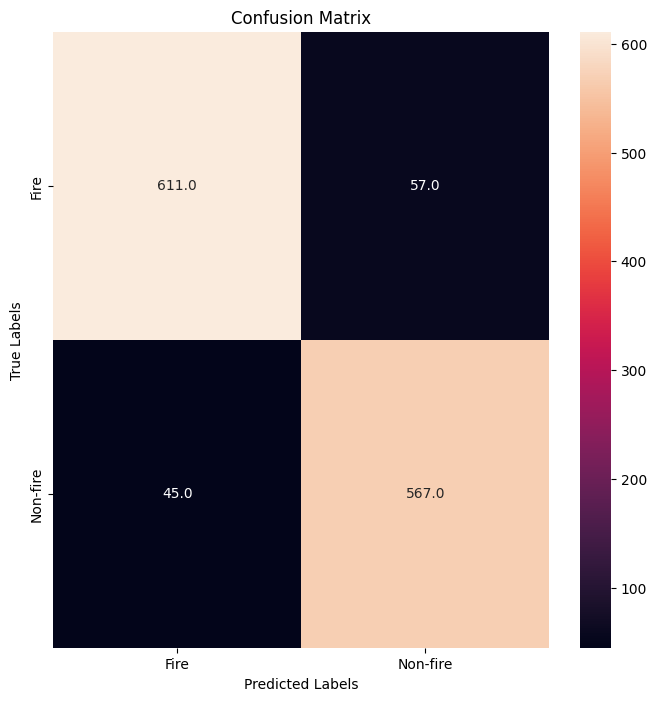

In [ ]:
confmx = confusion_matrix(y_test, pred)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.utils import load_img

test_case1 = load_img(test_dir + '/Fire' + '/135.jpg', target_size=(64,64))
input_arr = tf.keras.utils.img_to_array(test_case1)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr.reshape(1,1,64,64,3))

1/1 [==============================] - 0s 40ms/step


In [ ]:
(predictions>0.5).astype(int)

array([[0]])

In [ ]:
test_case1 = load_img(test_dir + '/Non-fire' + '/137.jpg', target_size=(64,64))
input_arr = tf.keras.utils.img_to_array(test_case1)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr.reshape(1,1,64,64,3))

1/1 [==============================] - 0s 32ms/step


In [ ]:
(predictions>0.5).astype(int)

array([[0]])

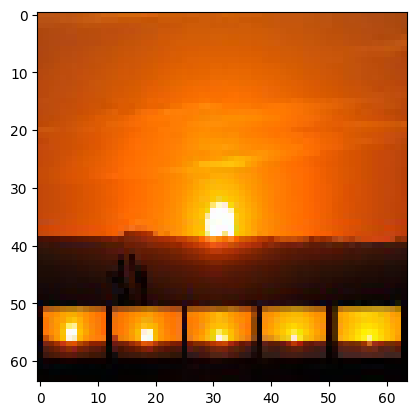

In [ ]:
import cv2
is_mymodel_good = cv2.imread('download.jpeg')
is_mymodel_good = cv2.resize(is_mymodel_good, (64,64))
is_mymodel_good = cv2.cvtColor(is_mymodel_good,cv2.COLOR_BGR2RGB)
is_mymodel_good=is_mymodel_good/255
plt.imshow(is_mymodel_good)

In [ ]:
class_index=model.predict(is_mymodel_good.reshape(1,1,64,64,3),batch_size=1)

1/1 [==============================] - 1s 641ms/step


In [ ]:
new_pred=(class_index> 0.5).astype(int)
new_pred

array([[0]])

Found 1280 images belonging to 2 classes.


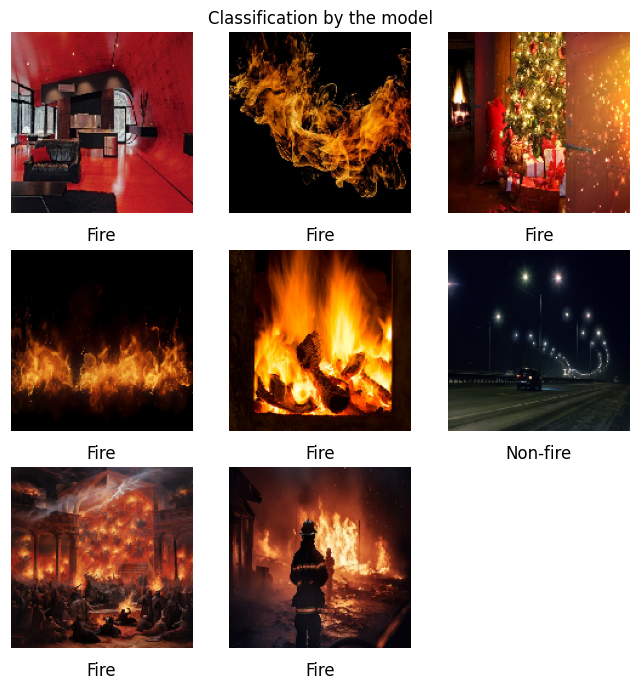

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(val_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

img, label = test_generator[0]



label_dict = {1: 'Non-fire', 0: 'Fire'}


# Generating collage of plots
fig = plt.figure(figsize=(8, 8))
plt.title('Classification by the model')
plt.axis('off')

for i, img_i in enumerate(img[:8]):
    ax = fig.add_subplot(3, 3, i+1)
    plt.axis('off')
    plt.title(label_dict[pred[i,-1]], y=-0.2)
    ax.imshow(img_i)

In [ ]:
model.save('cnn_lstm.h5')

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#on training data
predictions_train = model.predict(x_train)
pred_train= (predictions_train> 0.5).astype(int)
print(classification_report(y_train,pred_train))

339/339 [==============================] - 7s 20ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5334
           1       1.00      1.00      1.00      5499

    accuracy                           1.00     10833
   macro avg       1.00      1.00      1.00     10833
weighted avg       1.00      1.00      1.00     10833



In [ ]:
y = []
for feature, label in test_data:

  y.append(label)

In [ ]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding="same", activation="relu", input_shape=(None,64,64,3)))

model.add(LSTM(32, return_sequences=True))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(LSTM(64, return_sequences=True))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(LSTM(128))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2))

model.add(LSTM(32, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(128))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation="relu"))

model.add(Dense(84,activation="relu"))
model.add(Dense(32,activation="relu"))

model.add(Dense(2, activation="softmax"))

model.summary()

ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=5. Full shape received: (None, None, 64, 64, 32)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(None,1,64,64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

ValueError: Input 0 of layer "max_pooling2d_3" is incompatible with the layer: expected ndim=4, found ndim=6. Full shape received: (None, None, 1, 62, 62, 32)

In [ ]:
# instantiate model
model = Sequential()

# add three time-distributed convolutional layers for feature extraction
model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu'),input_shape=(1,150,150, 3)))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(1, 1))))

model.add(TimeDistributed(Conv2D(128, (3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(128, (3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(256, (3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(256, (3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

# extract features and dropout
model.add(TimeDistributed(Flatten()))
model.add(Dropout(0.5))

# input to LSTM
model.add(LSTM(256, return_sequences=False, dropout=0.5))

# classifier with sigmoid activation for multilabel
model.add(Dense(2, activation='sigmoid'))

# compile the model with binary_crossentropy loss for multilabel
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

# look at the params before training
#model.summary()